<a href="https://github.com/AI-FREE-Team/Machine-Learning-Basic/blob/main/Materials/%E7%B5%B1%E8%A8%88%E6%A6%82%E5%BF%B5_%E7%B5%B1%E8%A8%88%E5%88%86%E5%B8%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/README_imgs/aifreeteam.png) 
<center>Welcome to the course《Python: from business analytics to Artificial Intelligence》by AI . FREE Team.</center>
<center>歡迎大家來到 AI . FREE Team 《Python 從商業分析到人工智慧》的第二堂課 - 機器學習(ML)基礎教學。 </center>
<br/>

<center>作者: Michelle Chuang (<a href="https://github.com/sueshow">Github</a>)</center>
<center>AI . FREE Team: <a href="https://aifreeblog.herokuapp.com/">https://aifreeblog.herokuapp.com/</a></center>
<br>


# 前言

本篇文章以 <font color="#00dd00">**Python**</font> 3.7.10、<font color="#00dd00">**Numpy**</font> 1.19.5、<font color="#00dd00">**Pandas**</font> 1.1.5、<font color="#00dd00">**Matplotlib**</font> 3.2.2、<font color="#00dd00">**Seaborn**</font> 0.11.1、<font color="#00dd00">**SciPy**</font> 1.4.1 進行教學。本篇文章將介紹常見類型的統計分布，以及統計中最重要的定理(中央極限定理)：
* 離散型：均勻分配、柏努利分配、二項分配
* 連續型：均勻分配、常態分配

## 匯入基本套件

In [ ]:
!python --version

Python 3.7.11


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt   # 繪製影像 
import seaborn as sns
import scipy as sp

print( 'NumPy 版本: ', np.__version__ )
print( 'Pandas 版本: ', pd.__version__ )  
print( 'Matplotlib 版本: ', matplotlib.__version__ )
print( 'Seaborn 版本: ', sns.__version__ )
print( 'SciPy 版本: ', sp.__version__ )

NumPy 版本:  1.19.5
Pandas 版本:  1.1.5
Matplotlib 版本:  3.2.2
Seaborn 版本:  0.11.1
SciPy 版本:  1.4.1


# 統計分佈

## 離散型

### 離散均勻分配 (Discrete Uniform Distribution)

* 說明：有限個數值擁有相同的機率
* 函數：
  * $ f(x) = P(X=x) = \frac{1}{N} , x = 1,2,...,N $
  * $ X \sim DU(1, N) $
* 生活實例
  * 投擲骰子或銅板
  * 圓周率小數點後的數值
* 語法

| 離散均勻分配 | 語法(scipy.stats) |
|----------------|:----------------:|
| 機率質量函數	| randint.pmf |
| 累積機率函數	| randint.cdf |
| 樣本點	| randint.rvs |
| 統計量計算	| randint.stats |

* 匯入套件

In [ ]:
from scipy.stats import randint

* 產出分配的資料

In [ ]:
low, high = 7, 31
mean, var, skew, kurt = randint.stats(low, high, moments='mvsk')
r = np.arange(low, high)
print(r)
print('='*20)
x = np.arange(randint.ppf(0.01, low, high),
        randint.ppf(0.99, low, high))
print(x)

[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24.
 25. 26. 27. 28. 29.]


* 資料繪圖

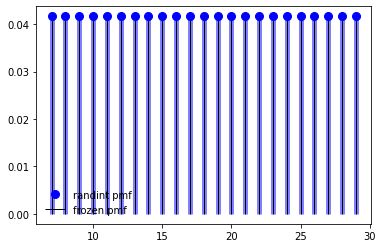

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, randint.pmf(x, low, high), 'bo', ms=8, label='randint pmf')
ax.vlines(x, 0, randint.pmf(x, low, high), colors='b', lw=5, alpha=0.5)

rv = randint(low, high)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

* 產生符合分配的隨機樣本點 (random sample)

[26 16 29 17 29 27 16 25 15 11  8 17 30 22 23 22 25 20 12  7]


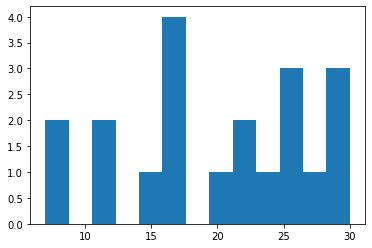

In [ ]:
X = randint.rvs(low, high, size=20)
print(X)
plt.hist(X, bins=13)
plt.show()

### 伯努利分配 (Bernoulli Distribution)

* 說明：只有兩種可能結果 (成功或失敗) 的單次隨機試驗，且成功的機率為 p (固定)，則稱為* 試驗為「伯努利試驗 (Bernoulli trial)」
* 函數：
  * $ f_X(x) = p^x(1-p)^{(1-x)} , x = 0,1 $
* 性質：
  * $ P(X=1) = p $
  * $ P(X=0) = 1-p = q $
  * $ X \sim bernoulli(p) $
  * $ \mu = E(X) = p $
  * $ \sigma^2 = Var(X) = p(1-p) $
* 語法

| 伯努利分配	| 語法(scipy.stats) |
|----------------|:----------------:|
| 機率質量函數	| bernoulli.pmf |
| 累積機率函數	| bernoulli.cdf |
| 樣本點	| bernoulli.rvs |
| 統計量計算	| bernoulli.stats |

* 匯入套件

In [ ]:
from scipy.stats import bernoulli

* 產出分配的資料

In [ ]:
p = 0.4 # 事件A 機率 0.4
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
r = np.arange(0,2) # 可以出現的範圍為 0、1、2種可能出現的結果
print(r)
print('='*20)
x = np.arange(bernoulli.ppf(0.01, p),
        bernoulli.ppf(0.99, p))
print(x)

[0 1]
[0.]


* 資料繪圖

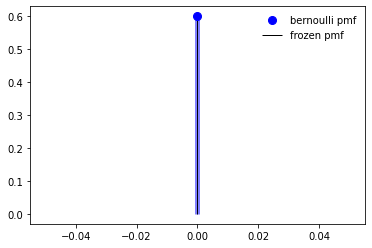

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

* 產生符合分配的隨機樣本點 (random sample)

[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]


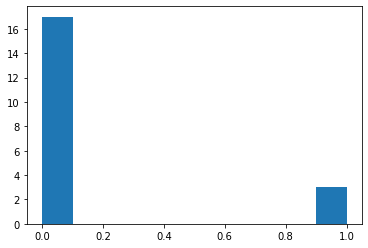

In [ ]:
X = bernoulli.rvs(p, size=20)
print(X)
plt.hist(X)
plt.show()

### 二項分配 (Binomial Distribution)

* 進行多次相同伯努利試驗，且試驗結果互相獨立，結果只有 2 種結果，稱為二項分配 (Binomial Experiment)
* 隨機一次試驗出現事件 A 的機率如果為 p，那麼在重複 n 次試驗中出現 x 次事件 A 的機率為：
  $ f(n,x,p) = C_x^n * p^x * (1-p)^(n-x) , x = 0,...,n $ $ C_x^n =  \left( \begin{array}{c} x \\ y \end{array} \right)
= \frac{n!}{k!(n-k)!} $
* 語法

| 二項分配	| 語法(scipy.stats) |
|---------------|:---------------:|
| 機率質量函數	| binom.pmf |
| 累積機率函數	| binom.cdf |
| 樣本點	| binom.rvs |
| 統計量計算	| binom.stats |

* 匯入套件

In [ ]:
from scipy.stats import binom

* 產出分配的資料

In [ ]:
p = 0.4 # 事件 A 機率 0.4
n = 5   # 重複實驗 5 次
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
r = np.arange(0,6) # 可以出現的範圍為 0,1,2,...,5-->6種可能出現的結果
print(r)
print('='*20)
x = np.arange(binom.ppf(0.01, n, p),
        binom.ppf(0.99, n, p))
print(x)

[0 1 2 3 4 5]
[0. 1. 2. 3. 4.]


* 資料繪圖

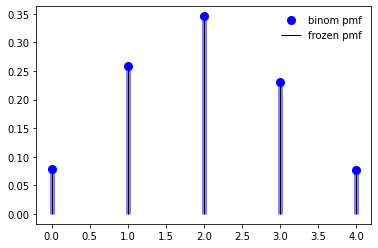

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

* 產生符合分配的隨機樣本點 (random sample)

[3 3 3 1 1 1 1 2 1 2 3 1 2 2 3 2 2 2 3 2]


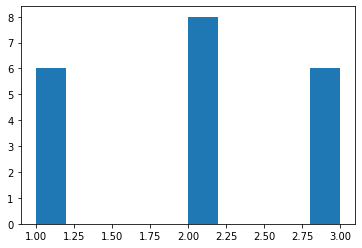

In [ ]:
X = binom.rvs(n, p, size=20)
#array([2, 3, 1, 2, 2, 2, 1, 2, 2, 3, 3, 0, 1, 1, 1, 2, 3, 4, 0, 3])
print(X)
plt.hist(X)
plt.show()

## 連續型

* f(x) 為 X 的機率分配函數（機率密度函數），則 f(x) 符合以下條件：
  * $ f(x) \geqslant 0 $
  * $ f(x) $ 圖形下總面積為 1，即 $ \int_{-\infty}^{\infty} f(x) dx = 1 $
* 性質：
  * f(x) 並非機率，即 $ f(a) \neq P(X=a)$，a 為任意數
  * f(x) 圖形下面積才為機率
    * $ P(-2 \leq X \leq 2) =  \int_{-2}^{2} f(x) dx$
  * 期望值
    * $ E(X) =  \int_{-\infty}^{\infty} x*f(x) dx $
  * 變異數
    * $ Var(X) = E(X^2)-E(X)^2 =  \int_{-\infty}^{\infty} x^2*f(x) dx-E(X)^2 $
  * 累積分布函數(cdf)：又叫分佈函數，是機率密度函數的積分，能完整描述一個實隨機變數 X 的機率分佈
    * $ F(X) = P(X \leq x)$

### 連續均勻分配 ([Uniform Distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html))

* 說明：一個均勻分佈在區間 [a,b] 上的連續型隨機變量 X，記做 X ~ U(a, b)
* 機率密度函數(pdf) <br>

  $f(x)=\left\{
    \begin{matrix}
      \frac{1}{b-a} &, for  a \leq x \leq b \\
      0 & , otherwise
    \end{matrix}
   \right.$

* 累積分布函數(cdf) <br>

  $F(x)=\left\{
    \begin{matrix}
          0 &, for  x < a \\
          \frac{x-a}{b-a} &, for a \leq x < b \\
          1 &, for x \geq b
    \end{matrix}
  \right.$

* 期望值
  * $ E(X) = \frac{a+b}{2} $
* 變異數
  * $ Var(X) = \frac{(b-a)^2}{12} $
* 語法

| 連續型均勻分配	| 語法 |
|--------------------|:--------------------:|
| 機率質量函數	| uniform.pdf |
| 累積機率函數	| uniform.cdf |
| 樣本點	| uniform.rvs |
| 統計量計算	| uniform.stats |

* 匯入套件

In [ ]:
from scipy.stats import uniform

* 設定使用參數

In [ ]:
low = 1
high = 5
x = np.linspace(0, 10, 50)

* 產生符合分配的隨機樣本點 (random sample)

[2.68040477 2.89243946 4.18234615 3.29222944 3.76822059 2.56669783
 2.02092545 3.92638981 2.23090646 2.16198325 1.14153702 4.95839119
 2.1918555  3.75525862 2.53514665 1.02897688 1.57253614 3.55557489
 3.1374028  1.02822196]


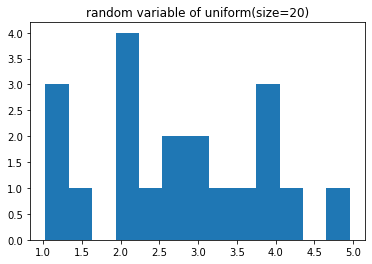

In [ ]:
X = uniform.rvs(low, high-low, size=20)
print(X)
plt.hist(X, bins=13)
plt.title('random variable of uniform(size=20)')
plt.show()

### 常態分佈 ([Normal Distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html))

* 常態分佈(normal distribution)，又稱高斯分佈(Gaussian distribution)
* 說明：若隨機變數 X 服從一個平均數為 $\mu$ 和 標準差為 $\sigma$ 的常態分配，其記為 $X \sim N (\mu, \sigma^2)$
* 機率密度函數(pdf)
  * $ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$
* 期望值 $\mu$ 決定 pdf 位置
  * $ E(X) = \mu $
* 變異數 $\sigma$ 決定 pdf 寬度
  * $ Var(X) = \sigma^2 $
* 特性
  * 以平均數為中線，構成左右對稱之單峰、鐘型曲線分佈
  * 觀察值之範圍為負無限大至正無限大之間
  * 變項之平均數、中位數和眾數為同一數值
  * $\mu$＝0，$\sigma^2$＝1，稱為標準常態分配
* 語法

| 連續型均勻分配	| 語法 |
|--------------------|:--------------------:|
| 機率質量函數	| norm.pdf |
| 累積機率函數	| norm.cdf |
| 樣本點	| norm.rvs |
| 統計量計算	| norm.stats |

* 標準常態分配
  * Z分數：標準化 $ Z = \frac{X-\mu}{\sigma} $
  * 特性
    * 落在 $ \mu \pm 1個 \sigma：68.3 \% $
    * 落在 $ \mu \pm 2個 \sigma：95.4 \% $
    * 落在 $ \mu \pm 3個 \sigma：99.7 \% $
* 參數說明
  * loc：代表mu
  * scale：代表sigma

* 匯入套件

In [ ]:
from scipy.stats import norm

* 設定使用參數

In [ ]:
mu = 0
sigma = 1
x = np.linspace(-4, 4, 500)

* 產生符合分配的隨機樣本點 (random sample)

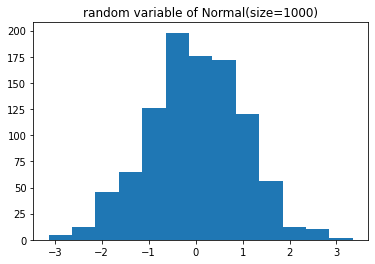

In [ ]:
X = norm.rvs(mu, sigma, size=1000)
plt.hist(X, bins=13)
plt.title('random variable of Normal(size=1000)')
plt.show()

* Z 分數：$\frac{X_i-mean(X)}{std(X)}$

* 本篇文章將收集男生身高教大家認識 Z 分數，資料如下：

In [ ]:
#輸入資料
boys = [164, 176, 169, 169, 165, 175, 159, 151, 144, 160,
     183, 165, 156, 170, 164, 173, 165, 163, 177, 171]

In [ ]:
zScores = []
m = np.mean(boys)
n = np.std(boys)

for i in boys:
    zScore = round((i - m)/n, 2)
    zScores.append(zScore)
print('Z-Scores: \n', zScores)

Z-Scores: 
 [-0.22, 1.12, 0.34, 0.34, -0.11, 1.01, -0.77, -1.66, -2.44, -0.66, 1.9, -0.11, -1.11, 0.45, -0.22, 0.79, -0.11, -0.33, 1.23, 0.56]


# 中央極限定理

* 從平均數 $\mu$﹐標準差 $\sigma$ 的母體中抽樣大小為 n 的簡單隨機樣本，當樣本數 n 夠大時，樣本平均數($ \bar{X}_n $) 的抽樣分配會近似於常態分配
  * 一般統計實務，大部分的應用假設 n 大於 30 時，樣本平均數($ \bar{X}_n $) 的抽樣分配接近常態分配
  * 當母體為常態分配，不管 n，樣本平均數($ \bar{X}_n $) 的抽樣分配皆為常態分配
* 符合
  * $ E(X) $ 存在
  * $ 0 \leq Var(X) \leq \infty $ 存在

## 用模擬驗證中央極限定理

* $X \sim bernoulli(p)$ 從伯努利分配中，抽取 n 個樣本，$X_1,..., X_n$，重複抽了 500 次，每一次都計算 $ \bar{X}_n $，長條圖呈現 500 次 $ \bar{X}_n $ 結果

In [ ]:
# 計算樣本平均數
def cal_mean(x):
    return(sum(x)/len(x))

* 模擬重複抽樣 500 次，看樣本平均 (n=100) 的分布情形

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


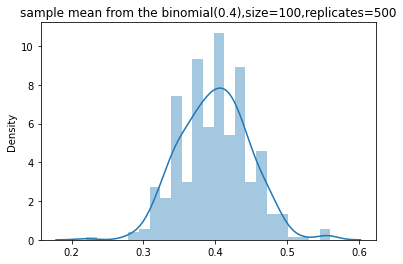

In [ ]:
p = 0.4
mean_rv = []
for i in range(500):
    X = bernoulli.rvs(p, size=100)
    mean_rv.append(cal_mean(X))
sns.distplot(mean_rv)
plt.title('sample mean from the binomial(0.4),size=100,replicates=500')
plt.show()

* 模擬重複抽樣 500 次，看樣本平均 (n=100000) 的分布情形

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


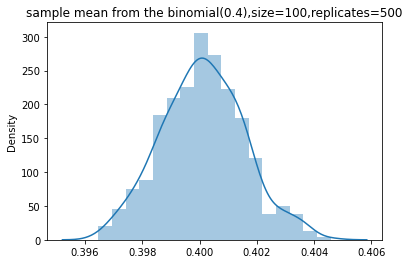

In [ ]:
p = 0.4
mean_rv = []
for i in range(500):
    X = bernoulli.rvs(p, size=100000)
    mean_rv.append(cal_mean(X))
sns.distplot(mean_rv)
plt.title('sample mean from the binomial(0.4),size=100,replicates=500')
plt.show()

這個範例的分布圖更接近常態分佈了。

# 結語 

本篇文章介紹常見類型的統計分佈，以及統計之中央極限定理，其中，常態分布是自然科學與行為科學中的定量現象的一個方便模型，各種各樣的心理學測試分數和物理現象比如光子計數都被發現近似地服從常態分布，要理解如何運用這些機率分佈函數，需要重新整理機率事件以及條件機率的計算，讀者可透過本篇文章的介紹更進一步瞭解分佈的樣貌。<br>
針對本文的內容，若讀者們有發現任何的錯誤或疑問，非常歡迎您 [來信 sueshow2006@gmail.com](mailto:sueshow2006@gmail.com) 給予建議及討論，讓我們一同來學習成長！

# 參考資料

* [模擬的機率分佈：統計方法的實證作用](https://scgeeker.github.io/BasicStatistics/distribution.html)
* [30天搞懂Python-常態分配](https://ithelp.ithome.com.tw/articles/10239607)
* [python 如何判斷一組數據是否符合正態分布](https://codingnote.cc/zh-tw/p/149154/)
* [统计概率思维及几种分布的Python实现](https://zhuanlan.zhihu.com/p/268212254)

# 返回 [課程大綱](https://github.com/AI-FREE-Team/Machine-Learning-Basic#%E8%AA%B2%E7%A8%8B%E5%A4%A7%E7%B6%B1-course-outline)